In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Making Predicitons on a linear dataset

### Dataset Prepration

In [2]:
X,Y = make_blobs(n_samples=500,n_features=2,random_state=8,centers=2)
print(X.shape,Y.shape)

(500, 2) (500,)


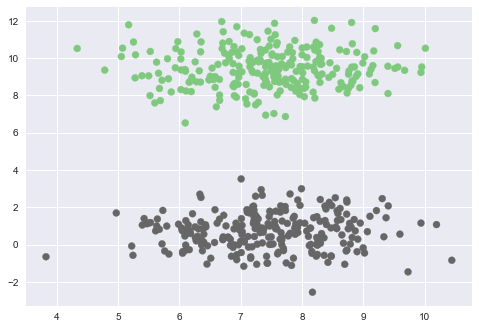

In [3]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

### Implementing the Perceptron model
#### Objectives:
   - **Learn the weights**
   - **Reduce the loss simultaneously**
   - **Make Predictions**

In [4]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

# Hypothesis function
def predict(X,weights):
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

def loss(X,Y,weights):
    ### Binary cross entropy is the loss function for single-layer perceptron ###
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_)-(1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate):
    """ Perform weight updates for one epoch """
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_-Y)
    
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights

def train(X,Y,learning_rate=0.5,max_Epochs=1000):
    # Modifying the inputs to handle bias
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))

    #Initialising weights with 0
    weights = np.zeros(X.shape[1]) # n+1 features

    # Iterate over all epochs and update weights
    for epoch in range(max_Epochs):
        weights = update(X,Y,weights,learning_rate) 

        if epoch%10==0:
            l = loss(X,Y,weights)
            print("Epoch number is %d and loss value at this time is %.4f"%(epoch,l))
    
    return weights


In [5]:
weights = train(X,Y,learning_rate=0.5,max_Epochs=1000)

Epoch number is 0 and loss value at this time is 0.6237
Epoch number is 10 and loss value at this time is 0.0015
Epoch number is 20 and loss value at this time is 0.0014
Epoch number is 30 and loss value at this time is 0.0013
Epoch number is 40 and loss value at this time is 0.0013
Epoch number is 50 and loss value at this time is 0.0012
Epoch number is 60 and loss value at this time is 0.0012
Epoch number is 70 and loss value at this time is 0.0012
Epoch number is 80 and loss value at this time is 0.0012
Epoch number is 90 and loss value at this time is 0.0011
Epoch number is 100 and loss value at this time is 0.0011
Epoch number is 110 and loss value at this time is 0.0011
Epoch number is 120 and loss value at this time is 0.0011
Epoch number is 130 and loss value at this time is 0.0011
Epoch number is 140 and loss value at this time is 0.0010
Epoch number is 150 and loss value at this time is 0.0010
Epoch number is 160 and loss value at this time is 0.0010
Epoch number is 170 and l

In [6]:
def getPredictions(X_test,weights,labels):
    if X_test.shape[1] != weights.shape[0]:
        ones = np.ones((X_test.shape[0],1))
        X_test = np.hstack((ones,X_test))
    
    probs = predict(X_test,weights)

    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5]=1
        return labels

In [7]:
x1 = np.linspace(3.6,11,10)
x2 = -(weights[0] + weights[1]*x1)/weights[2]

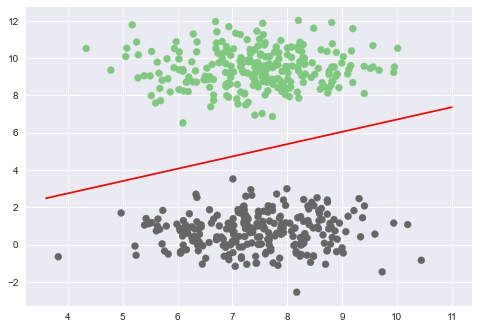

In [8]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

### Finding the Accuracy

In [9]:
Y_ = getPredictions(X,weights,labels = True)
training_accuracy = np.sum(Y_==Y)/Y.shape[0]
print("Accuracy on linear dataset is: %.1f"%(training_accuracy*100))

Accuracy on linear dataset is: 100.0


## Making Predicitons on a non-linear dataset

In [10]:
from sklearn.datasets import make_moons
non_X,non_Y = make_moons(n_samples=1000,noise=0.1,random_state=3)
print(non_X.shape,non_Y.shape)

(1000, 2) (1000,)


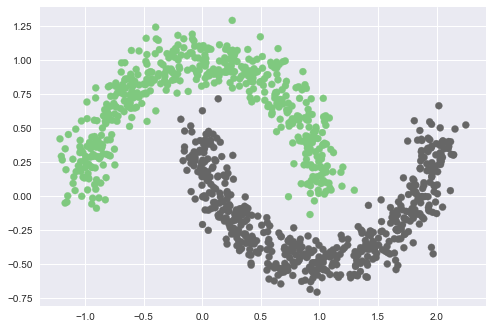

In [11]:
plt.style.use("seaborn")
plt.scatter(non_X[:,0],non_X[:,1],c=non_Y,cmap=plt.cm.Accent)
plt.show()

In [12]:
non_weights = train(non_X,non_Y,learning_rate=0.7,max_Epochs=1000)

Epoch number is 0 and loss value at this time is 0.6286
Epoch number is 10 and loss value at this time is 0.4064
Epoch number is 20 and loss value at this time is 0.3509
Epoch number is 30 and loss value at this time is 0.3241
Epoch number is 40 and loss value at this time is 0.3074
Epoch number is 50 and loss value at this time is 0.2956
Epoch number is 60 and loss value at this time is 0.2868
Epoch number is 70 and loss value at this time is 0.2799
Epoch number is 80 and loss value at this time is 0.2743
Epoch number is 90 and loss value at this time is 0.2698
Epoch number is 100 and loss value at this time is 0.2661
Epoch number is 110 and loss value at this time is 0.2630
Epoch number is 120 and loss value at this time is 0.2604
Epoch number is 130 and loss value at this time is 0.2582
Epoch number is 140 and loss value at this time is 0.2563
Epoch number is 150 and loss value at this time is 0.2546
Epoch number is 160 and loss value at this time is 0.2532
Epoch number is 170 and l

In [13]:
non_x1 = np.linspace(-1.25,2.25,10)
non_x2 = -(non_weights[0] + non_weights[1]*non_x1)/non_weights[2]

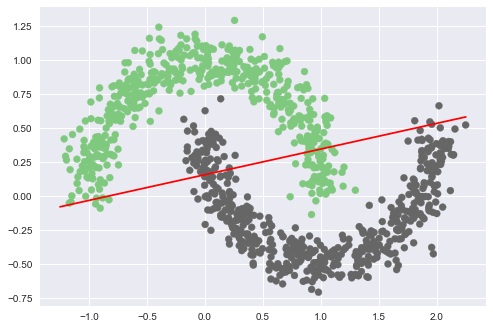

In [14]:
plt.scatter(non_X[:,0],non_X[:,1],c=non_Y,cmap=plt.cm.Accent)
plt.plot(non_x1,non_x2,c='red')
plt.show()

In [15]:
non_Y_ = getPredictions(non_X,weights,labels = True)
training_accuracy = np.sum(non_Y_==non_Y)/non_Y.shape[0]
print("Accuracy on non-linear dataset is: %.1f"%(training_accuracy*100))

Accuracy on non-linear dataset is: 83.5


So, we can conclude that a single-layer perceptron acts as a linear classifier and is not able to classify non-linear datasets. To be able to classify non-linear datatsets we need more powerful classifiers such as multi-layer perceptrons.